<a href="https://colab.research.google.com/github/Tclack88/Lambda/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [0]:
# !curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
# !curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names


# Number of Instances: 306
# Number of Attributes: 4 (including the class attribute)
# Attribute Information:
#    1. Age of patient at time of operation (numerical)
#    2. Patient's year of operation (year - 1900, numerical)
#    3. Number of positive axillary nodes detected (numerical)
#    4. Survival status (class attribute)
#          1 = the patient survived 5 years or longer
#          2 = the patient died within 5 year
# Missing Attribute Values: None

# Load data frame, include relevant headers
cols = ['age','year','nodes','survive']
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",names = cols)

# Verify No missing entries for each column
for x in cols:
  print("missing entries in column",x,":", df[x].isna().sum())

# Encode "survive" to more traditional values
def two_to_0(x):
  if x == 2:
    return 0
  else:
    return 1

df.survive = df.survive.apply(two_to_0)

missing entries in column age : 0
missing entries in column year : 0
missing entries in column nodes : 0
missing entries in column survive : 0


In [0]:
df.head()

,age,year,nodes,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# Summary Statistics
round(df.describe(),2)

,age,year,nodes,survive
count,306.00,306.00,306.00,306.00
mean,52.46,62.85,4.03,0.74
std,10.80,3.25,7.19,0.44
min,30.00,58.00,0.00,0.00
25%,44.00,60.00,0.00,0.00
50%,52.00,63.00,1.00,1.00
75%,60.75,65.75,4.00,1.00
max,83.00,69.00,52.00,1.00


In [0]:
# Crosstab, nodes to age (nodes are more concentrated in the lower end with a mean of 4, so it's sensible to check the early spread with smaller bin sizes)
age_bins = pd.cut(df.age,6)
#node_bins = pd.cut(df.nodes,5)
node_bins = pd.cut(df.nodes,[0,1,2,3,4,5,10,15,30,52],include_lowest=True) # include lowest set to allow for 0 to be included
year_bins = pd.cut(df.year,4)
#survive_bins = pd.cut(df.survive,1)
pd.crosstab(age_bins,[node_bins])

nodes,"(-0.001, 1.0]","(1.0, 2.0]","(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]","(5.0, 10.0]","(10.0, 15.0]","(15.0, 30.0]","(30.0, 52.0]"
age,,,,,,,,,
"(29.947, 38.833]",18,2,2,1,1,5,3,2,0
"(38.833, 47.667]",40,7,4,5,1,6,3,6,1
"(47.667, 56.5]",46,5,8,5,2,11,7,5,1
"(56.5, 65.333]",46,4,3,1,2,5,3,6,1
"(65.333, 74.167]",24,1,2,1,0,3,2,0,0
"(74.167, 83.0]",3,1,1,0,0,0,0,0,0


In [0]:
df2 = df.copy()
df2['age_bins'] = age_bins
df2['year_bins'] = year_bins
df2['node_bins'] = node_bins

#### The main diagonal below shows us many things:
- The age isn't evently distributed, it's normally distributed
- The years are somewhat even except the first year of the gathered research we have twice as much data then any other year
- There's a large number of "low node counts", they drop exponentially
- We have more data on survivors than non survivors

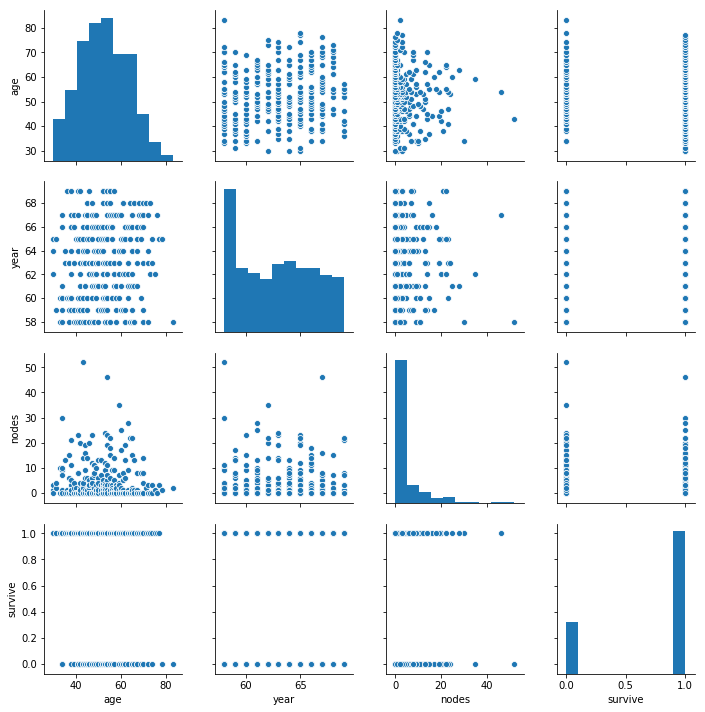

In [0]:
sb.pairplot(df);

## The below plot implies that the mean number of nodes are higher for those who died. This will be repeated in Section 3

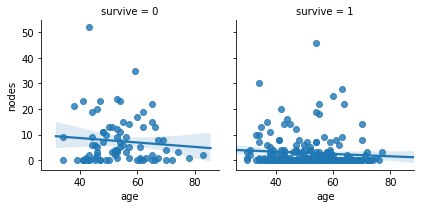

In [0]:
g = sb.FacetGrid(df2,col='survive')
g.map(sb.regplot,'age','nodes');

## Again, The plot below is consistant with the hypothesis that nodes and survival rate are inversely proportional

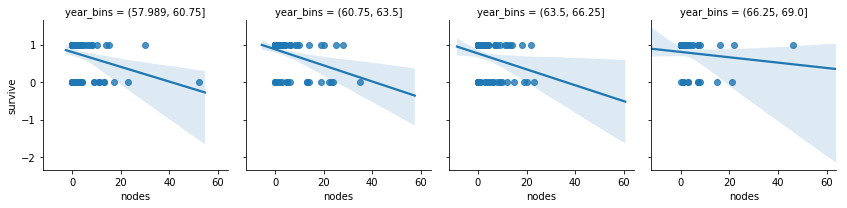

In [0]:
g = sb.FacetGrid(df2, col='year_bins')
g.map(sb.regplot,'nodes','survive');

### Age and Survival
It may superficially appear that older patients tend to die more readily. One can interpret this as older individuals perhaps are less able to cope with the cancer. (from the pair plot bottom left, survival as a function of age. Repeated below for ease). But controlling for age, we see the same underlying interpretation: fewer nodes is correlated with greater survival rates

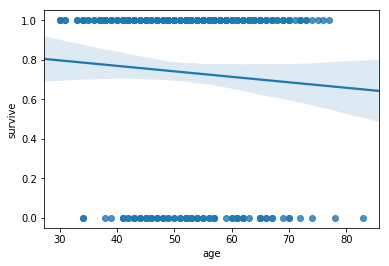

In [0]:
#df.plot.scatter('age','survive');
sb.regplot('age','survive',df);

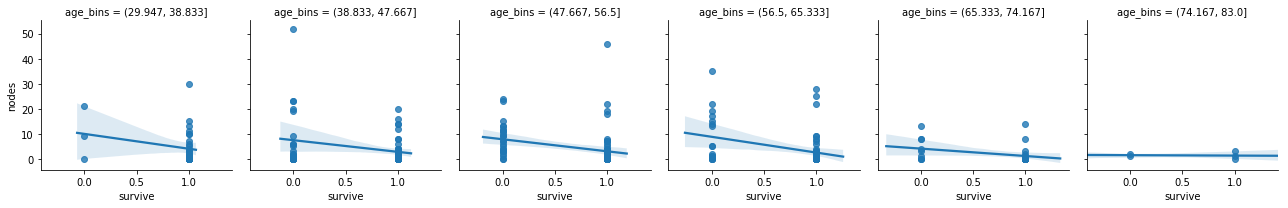

In [0]:
g = sb.FacetGrid(df2, col='age_bins')
g.map(sb.regplot,'survive','nodes');

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
df_survived = df[df.survive == 1]
df_died = df[df.survive == 0]

## Individuals who died

Average number of nodes in individuals who died
7.5


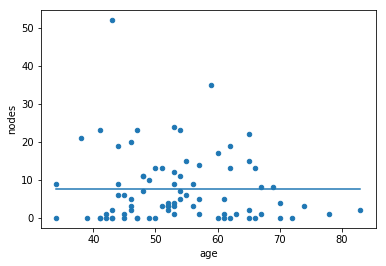

In [0]:
mean = round(df_died.nodes.mean(),1)
print("Average number of nodes in individuals who died")
print(mean)

df_died.plot.scatter('age','nodes');
plt.plot((df_died.age.min(),df_died.age.max()),(mean,mean)) # plot mean of ages
plt.show()

## Individuals who survived

Average number of nodes in individuals who survived
2.8


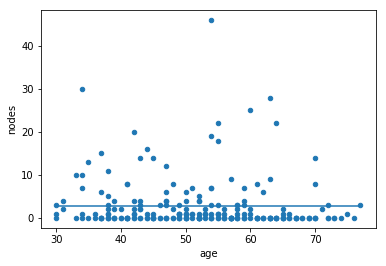

In [0]:
mean = round(df_survived.nodes.mean(),1)
print("Average number of nodes in individuals who survived")
print(mean)
df_survived.plot.scatter('age','nodes');
plt.plot((df_survived.age.min(),df_survived.age.max()),(mean,mean)) # plot mean of ages
plt.show()

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### Analyis:
There appears to be a negative relationship between number of nodes and surival rate. Indeed the mean number of nodes in those individuals who died is more than those who survuved.<br><br>
I was unable to identify any positive correlation. However I did notice that it may superficially appear that older patients tend to die more readily. One can interpret this as older individuals perhaps are less able to cope with the cancer. But controlling for age, we see the same underlying interpretation: fewer nodes is correlated with greater survival rates.<br><br>
This could be correlated because older people have more time to devlop nodes and thus tend not to survive as much as their younger coutnerparts.